In [1]:
import pandas as pd

### 목표
- 타이타닉 데이터를 학습해서 생존/사망 예측해보자
- 머신러닝 전체 과정을 이해해보자

#### 머신러닝 과정 정리
- 문제정의(주제, 어떤학습 진행해야 하는지?)
- 데이터수집(db, 크롤링, 공공포털사이트, github, aihub)
- 데이터전처리(이상치처리, 결측치처리, 오탈자제거, 수정)
- 탐색적데이터문석(eda:변수간의 관계파악(상관관계), 기술통계량)
- 모델 선택 및 하이퍼파라미터 지정
- 모델 학습
- 모델 예측 및 평가

#### 문제정의
1. 생존/사망(1/0) 예측하는 모델 생성
2. kaggle에 올려서 정확도 확인해보기 -> 높은 순위를 차지해볼까?!

#### 데이터 불러오기
- kaggle 사이트로부터 다운받은 데이터
- train, test: 훈련하고 평가하는 데이터
- gender_submission : 답안지파일(kaggle 올릴때 최종 예측된 결과를 담아서 업로드)

q1. 타이타닉 데이터 중에서 train, test 를 불러오기  
train =  
test =  
(단, 인덱스는 승객의 번호로해서 불러올 것)  
컬럼을 인덱스쪽으로 연결하는 키워드: index_col='PassengerId'


In [2]:
train = pd.read_csv('data/titanic/train.csv', index_col='PassengerId')
train.head()
#SibSp: 형제 자매, 배우자
#Parch: 부모, 자식
#Cabin: 객실번호
#Embarked: 승선항(S,C,Q)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('data/titanic/test.csv', index_col='PassengerId')
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


##### 데이터 전처리 및 탐색

In [4]:
# 전체크기
# 결측치 여부 확인
# info()
train.info()
# 열 개수 : 11
# label : Survived
# feature : Survived를 제외한 나머지 컬럼들
# 결측치 있는 컬럼: Age, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
test.info()
# 열 개수: 10 (답 레이블 X)
# 결측치가 있는 컬럼: Age, Fare, Cabin

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


##### Embarked 결측치 채우기

In [6]:
# train의 승선항 컬럼 인덱싱
train.loc[:,'Embarked'].value_counts()

# 일반적으로 사람이 많이 탄 승선항의 값을 사용해보자

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
train['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [8]:
# 결측치가 있는 사람들의 정보는 어떻지???
# embarked 결측치가 있는 사람들 행정보 출력
# 불리언 인덱싱 : 불리언값을 활용하여 데이터 접근 방법(특정조건을 가지고 접근)
train[train['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
# 결측치 채워보기
# fillna(값)
train['Embarked'] = train['Embarked'].fillna('S') # 1.결측치 확인 2.채우기

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


##### Fare 결측치 채우기

In [11]:
# 어떻게 채우지?
# 단순하게 Fare의 평균만 가지고 하는건 디테일 덜한것
# test-Fare 결측치가 있는 행 정보 출력해보기
test['Fare'].isnull()
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [12]:
# 3등급이고 남성인 사람들의 요금 평균은?
# Pclass, Sex, Fare
# train 데이터를 기준으로 값을 확인 -> 결측치를 처리
# test데이터는 좋은 기준이 되지 않음-> 학습할 때 도움을 주는 데이터X
train[['Pclass','Sex','Fare']].groupby(['Pclass','Sex']).mean()

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [13]:
# fillna 채워보기 12.661633
test['Fare'].fillna(12.661633, inplace= True)

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


##### Age 채우기
- 단순 기술통계치로 채우지 않고, 다른 컬럼과의 상관관계를 이용해 채워보자.
- Age와 상관이 있는 컬럼 알아보기

In [15]:
# 상관관계 분석
train.corr().abs()['Age'].sort_values()

# 상관 계수
# -1~1 출력
# -1, 1에 가까운 값이면 상대적으로 상관이 있다
# 0에 가까운 값이면 상대적으로 상관이 없다
# Age 컬럼과 상관이 있는 컬럼은 뭘까? Pclass
# Sex 컬럼도 활용해보자.

Survived    0.077221
Fare        0.096067
Parch       0.189119
SibSp       0.308247
Pclass      0.369226
Age         1.000000
Name: Age, dtype: float64

In [16]:
# 나이와 상관이 있을 Pclass, Age 활용하여 나이의 평균 출력해보자
gb1 = train[['Pclass','Age','Sex']].groupby(['Pclass','Sex']).mean()
gb1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [17]:
# gb1: 1등급 남성의 나이 평균 인덱싱
gb1.loc[(1,'male'),'Age']
#gb1.loc[(1,'male')]

41.28138613861386

In [18]:
# 3등급 여성의 나이 평균 인덱싱
gb1.loc[(3,'female'),'Age']

21.75

In [19]:
# apply : 복잡한 기준을 확인해서 일치하는 값을 채워주는 함수를 정의하고 연결
# 1. 함수 정의
# 2. 데이터 프레임에 적용 apply
# age 결측치 처리하는 함수 정의
import numpy as np
def fill_age(row): #row 데이터를 받아주는 매개변수
    # 만약 나이가 결측치라면 gb1에서 값을 인덱싱하여 넣어주고
    if np.isnan(row['Age']):
        return gb1.loc[(row['Pclass'],row['Sex'])]
    # 결측치가 아니라면 원래 나이값을 사용하자.
    else:
        return row['Age']

In [20]:
# astype() : 형변환 함수
train['Age'] = train.apply(fill_age, axis = 1).astype('int64')

In [21]:
# null 있는 행 확인해보기
# train.info()
# isnull()
train[train['Age'].isnull()] #아무행도 출력x, 결측치X

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [22]:
#test 데이터의 결측치 처리
#test
test['Age']=test.apply(fill_age, axis = 1).astype('int64')
test[test['Age'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


#### Apply란?
- 적용하다!!
- 판다스에서 제공하는 함수 이외에 사용자가 정의해놓은 더 복잡한 연산을 하는 함수를 연결시키는 기능
- return 실제 데이터 적용해줄 수 있음

In [23]:
# 예시 함수 정의
# 데이터 받아줄 변수
def str_print(x):
    print(x)

In [24]:
tmp= pd.DataFrame({'Name':['윤태원','김일경','서영현','김민서','김성훈'],
                   'Sex':['남','여','남','여','남'],
                  'Age':[25,23,19,24,10]})
tmp

,Name,Sex,Age
0,윤태원,남,25
1,김일경,여,23
2,서영현,남,19
3,김민서,여,24
4,김성훈,남,10


In [25]:
# der str_print(x):
#    print(x)
# axis=0 행방향으로 데이터 확인
# axis = 1 열방향
#tmp.apply(str_print, axis=1)
#주의) 2차원:axis설정 필요(기본값:0), 1차원:axis설정필요x(방향1개)
tmp['Name'].apply(str_print)

윤태원
김일경
서영현
김민서
김성훈


0    None
1    None
2    None
3    None
4    None
Name: Name, dtype: object

#### Cabin 결측치 채우기

In [26]:
# 중복없이 값을 확인
train['Cabin'].unique() #null==nan

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [27]:
# 임의의 값으로 채워보기
# 결측치가 있다면 모두 'M'으로 채워주자
# fillna('M')
# 1. 캐빈 컬럼 인덱싱
# 2. fillna 적용
# 3. 실제 데이터에 반영X, Deck이라는 컬럼 추가 저장
train['Deck'] = train['Cabin'].fillna('M')

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
 11  Deck      891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 90.5+ KB


In [29]:
test['Deck'] = test['Cabin'].fillna('M')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
 10  Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 39.2+ KB


In [30]:
# 판다스 객체 내 문자열 접근 str 키워드
train['Deck'] = train['Deck'].str[0]

In [31]:
test['Deck'] = test['Deck'].str[0]
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,M
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,M
894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,M
895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,M
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,M
...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,26,0,0,A.5. 3236,8.0500,NaN,S,M
1306,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C105,C,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,M


In [32]:
# Cabin 컬럼 삭제
train.drop('Cabin', axis=1, inplace = True)

In [33]:
test.drop('Cabin', axis=1, inplace = True)

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Embarked  418 non-null    object 
 9   Deck      418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


#### 범주형 데이터 탐색
- train 데이터를 기준으로 탐색
- test를 탐색하는 것은 일반화에 도움 안됨

- Deck 시각화

In [35]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Deck'],
      dtype='object')

In [36]:
# Deck과 생존/사망(Survived)의 관계 확인
# 1. Deck, Survived, Name 인덱싱하기
# 2. Deck, Survived 그룹핑(groupby)
# 3. 남아 있는 Name컬럼에 대해서 count()함수 연결
train[['Deck','Survived','Name']].groupby(['Deck','Survived']).count()

Name
Deck Survived      
A    0            8
     1            7
B    0           12
     1           35
C    0           24
     1           35
D    0            8
     1           25
E    0            8
     1           24
F    0            5
     1            8
G    0            2
     1            2
M    0          481
     1          206
T    0            1

<AxesSubplot:xlabel='Deck', ylabel='count'>

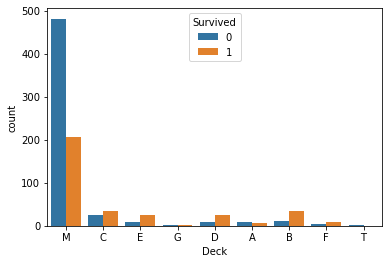

In [37]:
# sns.countplot()
import seaborn as sns
sns.countplot(data=train, x='Deck', hue='Survived')

-> M에서 상대적으로 사망의 비율이 높음

-> 생존/사망과 어떤 의미가 있을까?

-> M에 속한 사람들의 특징 확인해보기


- P class를 기준으로 생존/사망 시각화


<AxesSubplot:xlabel='Pclass', ylabel='count'>

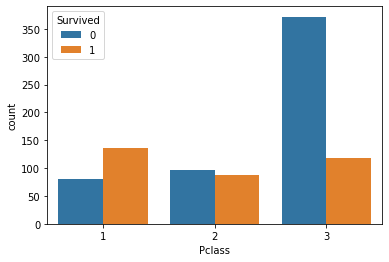

In [38]:
sns.countplot(data=train, x='Pclass', hue='Survived')

-> 3등급은 죽은 사람의 비율이 높음

-> 등급이 낮을수록 사망율 높음

- Deck과 Pclass 연결해서 시각화

<AxesSubplot:xlabel='Deck', ylabel='count'>

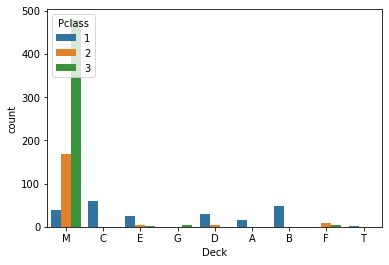

In [39]:
sns.countplot(data = train, x='Deck', hue='Pclass')

-> M에서 사망율이 높았던 이유는 3등급의 사람이 많았기 때문

-> M에 대해서 더 신경쓸 필요는 없음

- Sex와 생존/사망 관련하여 시각화

<AxesSubplot:xlabel='Sex', ylabel='count'>

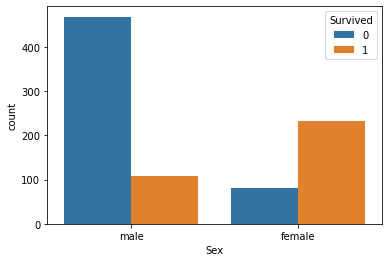

In [40]:
sns.countplot(data = train, x='Sex', hue='Survived')

-> 남성일때 사망율이 상대적으로 높음

-> 여성일때 생존율이 상대적으로 높음

- Embarked 과 생존/사망과 관련해서 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

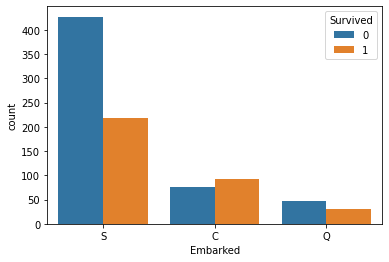

In [41]:
sns.countplot(data = train, x='Embarked', hue='Survived')

수치형 데이터 시각화
- Age 컬럼 생존/사망 관계 확인해보기
- 기준 추가 : 남자, 여자

In [42]:
# 바이올린 플롯: 데이터의 분포를 확인할때 사용
# boxplot + 확률밀도함수그래프

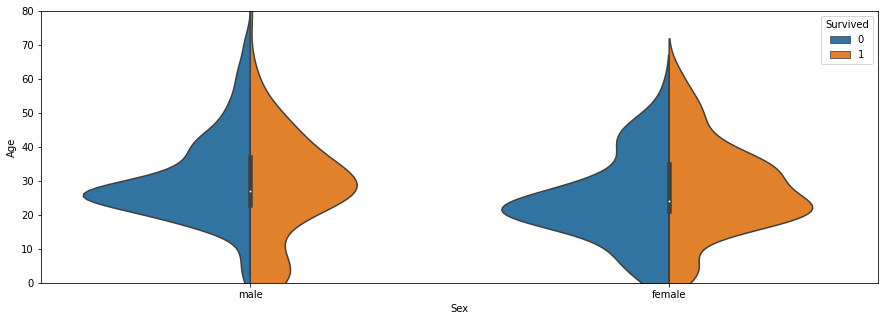

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
sns.violinplot(data=train, x='Sex', y='Age', hue='Survived', split=True)
plt.ylim(0,80)
plt.show()

-> 20~40대 사이가 많이 사망했음

-> 어린아이 중에서는 남자아이가 여자아이에 비해 많이 살아남았음

- Fare 와 생존/사망 시각화
- 성별 데이터 추가해서 확인

In [44]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

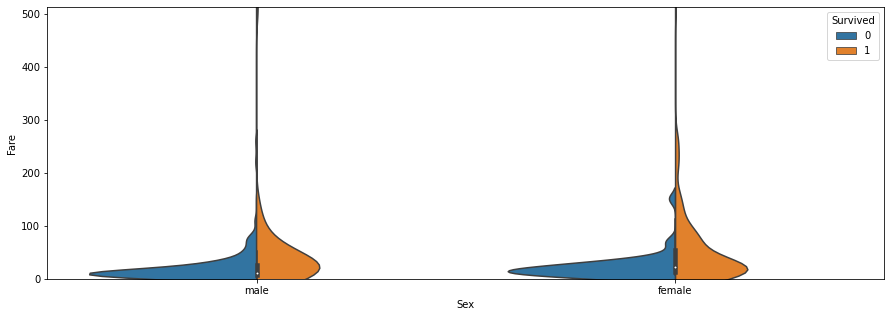

In [45]:
plt.figure(figsize = (15,5))
sns.violinplot(data = train,
              x= 'Sex',
              y='Fare',
              hue='Survived',
              split=True)
plt.ylim(0,513)
plt.show()

-> 요금이 싼 사람은 상대적으로 많이 죽었음

특성 공학 : 기존 컬럼을 가지고 새로운 컬럼 생성
- Parch, SibSp를 더해서 가족의 숫자라는 새로운 컬럼 만들기
- train에 진행한 작업은 test에도 해줘야함

In [46]:
# parch, sibsp
train['FamilySize'] = train['Parch'] + train['SibSp'] +1
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Name        891 non-null    object 
 3   Sex         891 non-null    object 
 4   Age         891 non-null    int64  
 5   SibSp       891 non-null    int64  
 6   Parch       891 non-null    int64  
 7   Ticket      891 non-null    object 
 8   Fare        891 non-null    float64
 9   Embarked    891 non-null    object 
 10  Deck        891 non-null    object 
 11  FamilySize  891 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 122.8+ KB


In [47]:
# test - FamilySize
test['FamilySize'] = test['Parch'] + test['SibSp'] +1
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Name        418 non-null    object 
 2   Sex         418 non-null    object 
 3   Age         418 non-null    int64  
 4   SibSp       418 non-null    int64  
 5   Parch       418 non-null    int64  
 6   Ticket      418 non-null    object 
 7   Fare        418 non-null    float64
 8   Embarked    418 non-null    object 
 9   Deck        418 non-null    object 
 10  FamilySize  418 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 39.2+ KB


<AxesSubplot:xlabel='FamilySize', ylabel='count'>

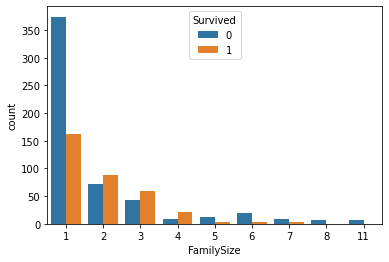

In [48]:
sns.countplot(data = train, x='FamilySize', hue='Survived')

-> 1일때에는 죽은 비율이 높고, 2-4명일때는 산 비율이 높고, 5명이상일때 죽은 비율이 높음  
-> 범주를 1일때 alone, 2~4명 small, 5이상일때는 large

- 수치, 범주(구간으로 잘라줌)

In [49]:
# bins 구간 설정
b = [0,1,4,11]
# 0<x<=1 - alone(1)
# 1<x<=4 - small(2,3,4)
# 4<x<=11 -large(5~11)
# labels 라벨명 설정(구간의 이름설정)
l = ['alone', 'small', 'large']
train['FamilyGroup'] = pd.cut(train['FamilySize'], bins= b, labels = l)
# test에도 패밀리그룹 만들어주기
test['FamilyGroup'] =  pd.cut(test['FamilySize'], bins= b, labels = l)

In [50]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Name         891 non-null    object  
 3   Sex          891 non-null    object  
 4   Age          891 non-null    int64   
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
 10  Deck         891 non-null    object  
 11  FamilySize   891 non-null    int64   
 12  FamilyGroup  891 non-null    category
dtypes: category(1), float64(1), int64(6), object(5)
memory usage: 123.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       ----

#### 불필요한 컬럼 삭제

In [51]:
# Ticket, FamilySize, Name 삭제 해주세요!
# train 삭제
# test 삭제
# drop
# axis = 설정
train.drop(['Ticket', 'FamilySize', 'Name'], axis = 1, inplace = True)
test.drop(['Ticket', 'FamilySize', 'Name'], axis = 1, inplace = True)

In [52]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Sex          891 non-null    object  
 3   Age          891 non-null    int64   
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Fare         891 non-null    float64 
 7   Embarked     891 non-null    object  
 8   Deck         891 non-null    object  
 9   FamilyGroup  891 non-null    category
dtypes: category(1), float64(1), int64(5), object(3)
memory usage: 102.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       418 non-null    int64   
 1   Sex          418 non-null    object  
 2   Age          418 n

#### 문제와 답으로 분리

In [53]:
# 3개
X_train = train.drop('Survived', axis=1) # 훈련용 문제
y_train = train['Survived']# 훈련용 답
X_test = test# 테스트용 문제
# y_test 테스트용 답 -> 캐글사이트

In [54]:
# 크기 확인
print('훈련문제:', X_train.shape)
print('훈련답:', y_train.shape)
print('테스트문제:', X_test.shape)

훈련문제: (891, 9)
훈련답: (891,)
테스트문제: (418, 9)


#### 특성 선택해서 인코딩(범주->수치형태)

In [55]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck',
       'FamilyGroup'],
      dtype='object')

In [56]:
cat_feature = ['Sex', 'Embarked', 'Deck', 'FamilyGroup']

In [57]:
# X_train 원핫인코딩
for cat_name in cat_feature:
    # pd.getdummies 원핫인코딩 함수
    dummy = pd.get_dummies(train[cat_name], prefix = cat_name)
    X_train = pd.concat([X_train, dummy], axis=1)
    X_train.drop(cat_name, axis=1, inplace = True)

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             891 non-null    int64  
 1   Age                891 non-null    int64  
 2   SibSp              891 non-null    int64  
 3   Parch              891 non-null    int64  
 4   Fare               891 non-null    float64
 5   Sex_female         891 non-null    uint8  
 6   Sex_male           891 non-null    uint8  
 7   Embarked_C         891 non-null    uint8  
 8   Embarked_Q         891 non-null    uint8  
 9   Embarked_S         891 non-null    uint8  
 10  Deck_A             891 non-null    uint8  
 11  Deck_B             891 non-null    uint8  
 12  Deck_C             891 non-null    uint8  
 13  Deck_D             891 non-null    uint8  
 14  Deck_E             891 non-null    uint8  
 15  Deck_F             891 non-null    uint8  
 16  Deck_G             891 non

In [59]:
# X_test 원핫인코딩
for cat_name in cat_feature:
    # pd.getdummies 원핫인코딩 함수
    dummy = pd.get_dummies(test[cat_name], prefix = cat_name)
    X_test = pd.concat([X_test, dummy], axis=1)
    X_test.drop(cat_name, axis=1, inplace = True)

In [60]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             418 non-null    int64  
 1   Age                418 non-null    int64  
 2   SibSp              418 non-null    int64  
 3   Parch              418 non-null    int64  
 4   Fare               418 non-null    float64
 5   Sex_female         418 non-null    uint8  
 6   Sex_male           418 non-null    uint8  
 7   Embarked_C         418 non-null    uint8  
 8   Embarked_Q         418 non-null    uint8  
 9   Embarked_S         418 non-null    uint8  
 10  Deck_A             418 non-null    uint8  
 11  Deck_B             418 non-null    uint8  
 12  Deck_C             418 non-null    uint8  
 13  Deck_D             418 non-null    uint8  
 14  Deck_E             418 non-null    uint8  
 15  Deck_F             418 non-null    uint8  
 16  Deck_G             418 

In [61]:
print(X_train.shape)
print(X_test.shape)

(891, 22)
(418, 21)


In [62]:
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'Deck_T',
       'FamilyGroup_alone', 'FamilyGroup_small', 'FamilyGroup_large'],
      dtype='object')

In [63]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Deck_A', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_M', 'FamilyGroup_alone',
       'FamilyGroup_small', 'FamilyGroup_large'],
      dtype='object')

In [64]:
X_test['Deck_T'] = 0

In [65]:
# set : 집합에 관련된 것을 쉽게 처리하기 위해 만든 자료형
# 중복을 허용하지 않음
# 순서가 존재하지 않음

In [66]:
set(X_train.columns) - set(X_test.columns)

set()

###  모델 선택 및 학습

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
from sklearn.model_selection import cross_val_score

#### KNN 모델

In [69]:
k_model = KNeighborsClassifier()

In [70]:
result = cross_val_score(k_model, X_train, y_train, cv=5)
result

array([0.69832402, 0.66292135, 0.69662921, 0.74157303, 0.74157303])

#### Tree 모델

In [71]:
t_model = DecisionTreeClassifier()

In [72]:
result = cross_val_score(t_model, X_train, y_train, cv=5)
result

array([0.75418994, 0.78089888, 0.83146067, 0.75842697, 0.78089888])

### 평가

In [73]:
su = pd.read_csv('./data/titanic/gender_submission.csv')

In [74]:
t_model.fit(X_train, y_train)
pre = t_model.predict(X_test)

In [75]:
pre

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [76]:
su['Survived'] = pre

In [77]:
su.to_csv('./submission_01.csv', index = False)

In [78]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(891, 22)
(891,)
(418, 22)


#### 앙상블 활용

In [83]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [93]:
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
logi = LogisticRegression()
forest = RandomForestClassifier()

In [94]:
voting = VotingClassifier(
    estimators = [
        ('knn', knn),
        ('tree', tree),
        ('logi', logi)
    ],
    voting = 'soft'
)

In [95]:
voting.fit(X_train, y_train)

C:\Users\smhrd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('tree', DecisionTreeClassifier()),
                             ('logi', LogisticRegression())],
                 voting='soft')

In [96]:
pre = voting.predict(X_test)
pre

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [97]:
sub  = pd.read_csv('./data/titanic/gender_submission.csv')

In [98]:
sub['Survived'] = pre
sub.to_csv('submission_en_01.csv', index = False)

In [99]:
forest = RandomForestClassifier(n_estimators = 1000,  # 생성할 트리개수
                                max_features = 0.6, # 사용할 특성의 비율
                                max_depth= 5,
                                min_samples_leaf= 20
                               )
                                

In [100]:
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=0.6, min_samples_leaf=20,
                       n_estimators=1000)

In [101]:
pre = forest.predict(X_test)
sub['Survived'] = pre
sub.to_csv('submission_en_Rf_01.csv', index = False)

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
gb = GradientBoostingClassifier(n_estimators= 500,
                               learning_rate = 0.01,
                               max_features = 0.6,
                               max_depth = 5,
                               min_samples_leaf = 20)

In [112]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, max_features=0.6,
                           min_samples_leaf=20, n_estimators=500)

In [113]:
pre = gb.predict(X_test)
sub['Survived'] = pre
sub.to_csv('submission_en_GB_01.csv', index = False)

In [118]:
gb = GradientBoostingClassifier(n_estimators= 100,
                               learning_rate = 0.01,
                               max_features = 0.6,
                               max_depth = 4,
                               min_samples_leaf = 20)
gb.fit(X_train, y_train)
pre = gb.predict(X_test)
sub['Survived'] = pre
sub.to_csv('submission_en_GB_01.csv', index = False)

#### 그리드서치

In [119]:
from sklearn.model_selection import GridSearchCV

In [121]:
param_grid = {
    'n_estimators' : [500, 1000, 1500, 2000],
    'max_features' : [0.6, 0.7, 0.8],
    'max_depth' : [3, 5, 7],
    'min_samples_leaf' : [10,15, 20]
}

In [122]:
grid = GridSearchCV(forest, param_grid, cv=3)

In [123]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, max_features=0.6,
                                              min_samples_leaf=20,
                                              n_estimators=1000),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': [0.6, 0.7, 0.8],
                         'min_samples_leaf': [10, 15, 20],
                         'n_estimators': [500, 1000, 1500, 2000]})

In [124]:
print('best score : ', grid.best_score_)
print('best parmas:', grid.best_params_)

best score :  0.819304152637486
best parmas: {'max_depth': 7, 'max_features': 0.7, 'min_samples_leaf': 10, 'n_estimators': 2000}
